<a href="https://colab.research.google.com/github/gathoni/hypothesis_testing/blob/master/Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Autolib Dataset**


## **1.1 INTRODUCTION**
### **1.1.1 Defining the question**

Investigating the electric (bluecars) car usage in Paris during weekdays.

Test a Hypothesis: whether there is difference in the means of blue cars taken in two different postal codes selected randomly on weekdays.

### **1.1.2 Metric of Success**
Our metric for success will be based on the analysis of the number bluecars taken in different stations. 

We will get two postal code areas using simple random samplinga and then compare their usage.

### **1.1.3 Understanding the context**
In this project we will seek to understand electric car usage by solving for another research question.

We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

To do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made.

An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”. The selected periods of interest be either weekdays or weekends but not a mix of both. We can also consider postal codes as some of the areas of interest.

### **1.1.4 Experimental Design**
Exploratory Data Analysis

Data Cleaning

Univariate, Bivariate Analysis

Visualizations

Testing a Hypothesis

Challenge our solution by providing insights on how we can make improvements.

### **1.1.5 Appropriateness of Data**
The dataset and glossary to use for this project can be found here [http://bit.ly/DSCoreAutolibDataset].

The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging)

## **1.2 EXPLORATORY DATA ANALYSIS**


### **1.2.1 Importing Libraries**

In [0]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling as pp
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
import math
from scipy.stats import ttest_ind
from statsmodels.stats import weightstats as stests
import warnings
warnings.filterwarnings('ignore')

### **1.2.2 Loading the Dataset**

In [0]:
# call our dataset autolib
autolib = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")

### **1.2.3 Viewing the dataset**

In [30]:
# Viewing the first 5 rows
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [31]:
#  Viewing the last 5 rows
autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [32]:
# Checking the dataset shape i.e. number of rows and columns
print('The Autolib dataset has ' + str(autolib.shape[0]) + 
      ' rows and ' +  str(autolib.shape[1]) + ' columns' )

The Autolib dataset has 16085 rows and 13 columns


In [33]:
# Check the data types of each column
autolib.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [34]:
# Checking the dataset information
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


These shows that our dataset has no missing values.

In [35]:
# Checking number of unique items in each column
autolib.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [36]:
# Summary description of our dataset
autolib.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [37]:
# Using Pandas Profiling to get a detailed summary report of our dataset
pp.ProfileReport(autolib)

Number of variables,13
Number of observations,16085
Total Missing (%),0.0%
Total size in memory,1.6 MiB
Average record size in memory,104.0 B
Numeric,5
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,6


### **Partititioning our dataframe into weekdays only**

In [38]:
# Work with either weekdays or the weekends.
# Weekdays
autolib = autolib[autolib['day_type'] == 'weekday']

# printing the dataset shape
print(autolib.shape)

# viewing the new dataset
autolib.head()

(11544, 13)


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


## **1.3 DATA CLEANING**
### **1.3.1 Fixing column names**

In [0]:
# Removing spaces in the columns names
autolib.columns = autolib.columns.str.lower().str.replace(" ", "")

In [40]:
# confirming the columns names
autolib.columns

Index(['postalcode', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [41]:
# Dropping columns we do not need for this analysis
# We are only dealing with Blue cars only for this analysis. 

autolib.drop(['utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 
            'utilib_14_returned_sum'], axis = 1, inplace = True)

# confirming that we only have the relevant columns
autolib.head()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,18,20


### **1.3.2 Missing values**


In [42]:
# Checking for missing values by column
autolib.isnull().sum()

postalcode               0
date                     0
n_daily_data_points      0
dayofweek                0
day_type                 0
bluecars_taken_sum       0
bluecars_returned_sum    0
slots_freed_sum          0
slots_taken_sum          0
dtype: int64

we have no missing values in any of the columns.

### **1.3.3 Anomalies**

In [43]:
# Checking for Anomalies
# duplicates 

autolib_duplicate = autolib[autolib.duplicated()]
autolib_duplicate.shape

(0, 9)

There are no duplicated rows in the dataset

### **1.3.3 Outliers**
#### **1.3.3.1 Boxplots**

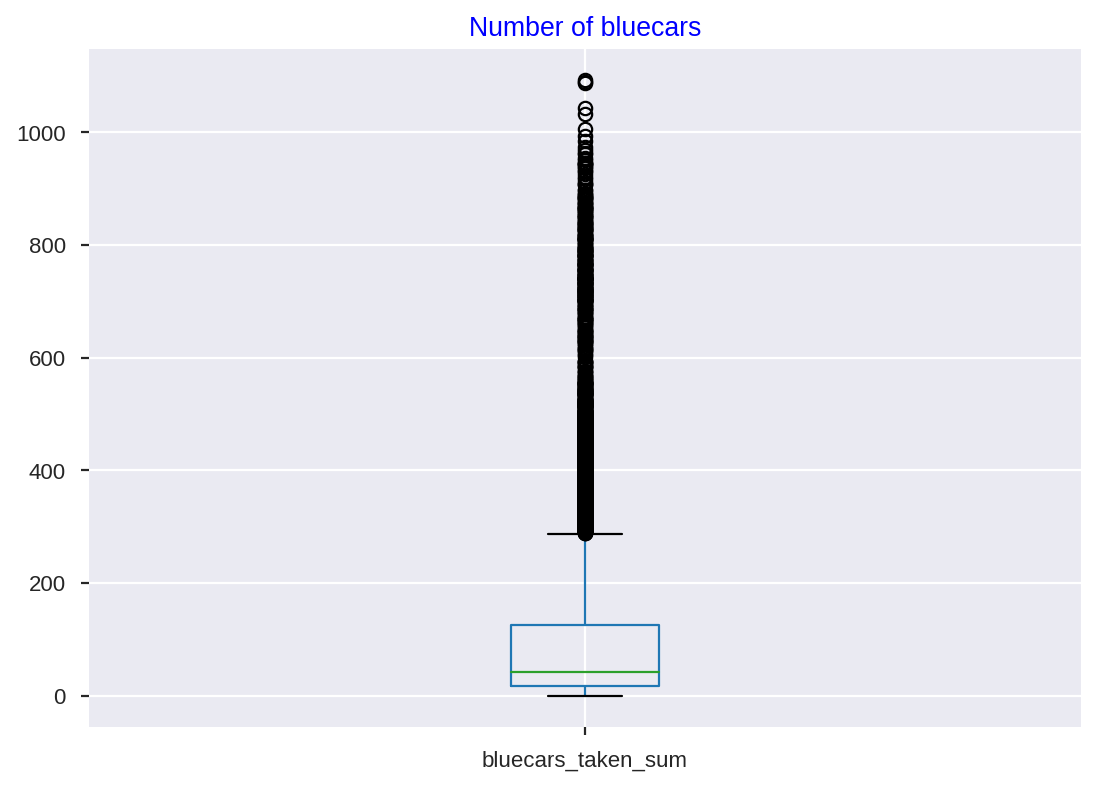

In [44]:
# Using box plots to check for outliers

# checking for outliers on the variable (bluecars_taken_sum) using boxplot

plt.figure(dpi = 160)
autolib.boxplot(['bluecars_taken_sum'])
plt.title("Number of bluecars", color = 'blue')
plt.show()

The boxplot shows a number of outliers indicated by the black points.
We will investigate them further before deciding to drop them

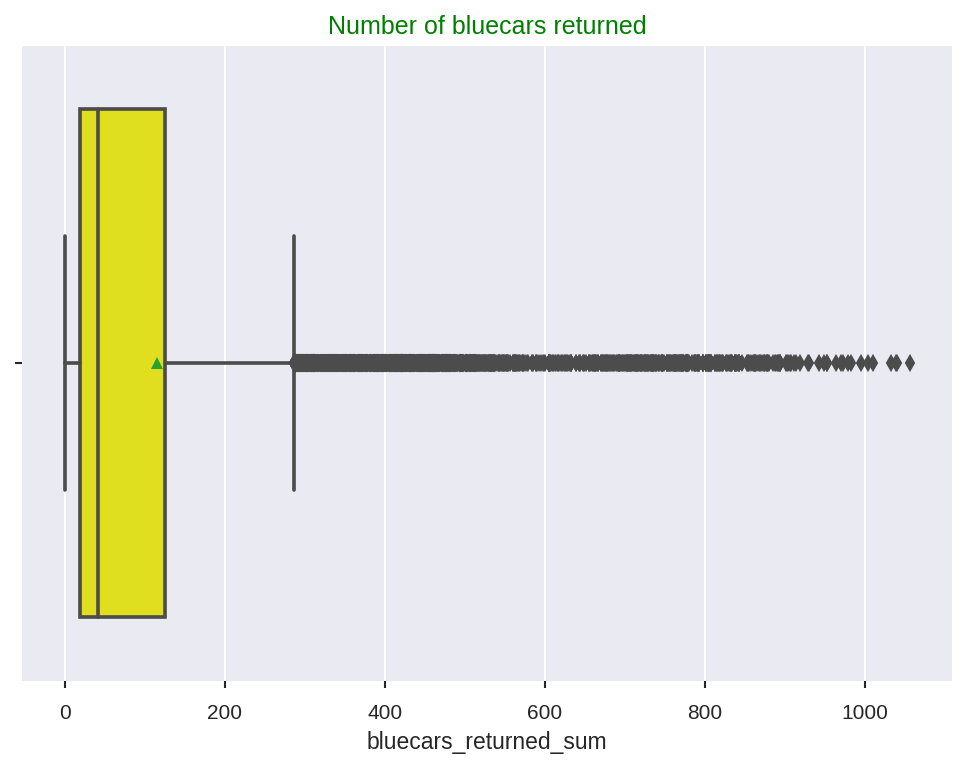

In [45]:
# Checking for outliers on the bluecars_returned_sum using boxplot

plt.figure(dpi = 150)
sns.boxplot(autolib['bluecars_returned_sum'], showmeans = True , color = 'yellow')
plt.title("Number of bluecars returned", color = 'Green')
plt.show()

## **1.4 UNIVARIATE ANALYSIS**
### **1.4.1 Visualizations**
#### **1.4.1.1 Histogram**

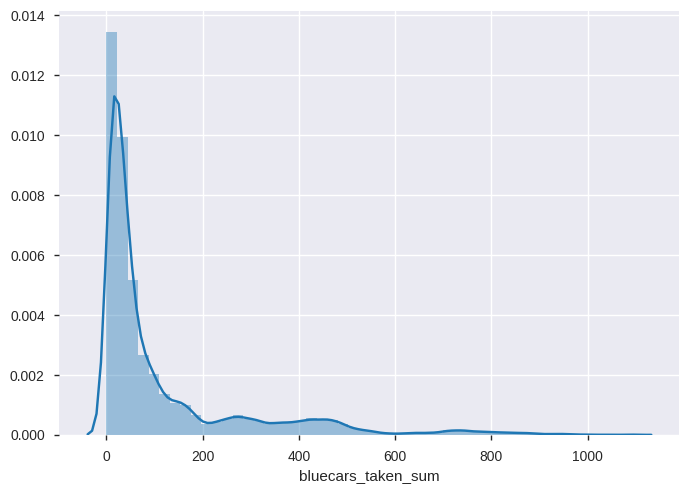

In [46]:
# Histogram of the bluecars_taken sum

sns.distplot(autolib.bluecars_taken_sum, kde = True)


The histogram shows us that the blue cars taken distribution is skewed to the right, this is because the tail is long to the right hand side.

In a perfect normal distribution, the tails on either side of the curve are exact mirror images of each other.

When a distribution is skewed to the right, the tail on the curve’s right-hand side is longer than the tail on the left-hand side, and the mean is greater than the mode. This situation is also called positive skewness.

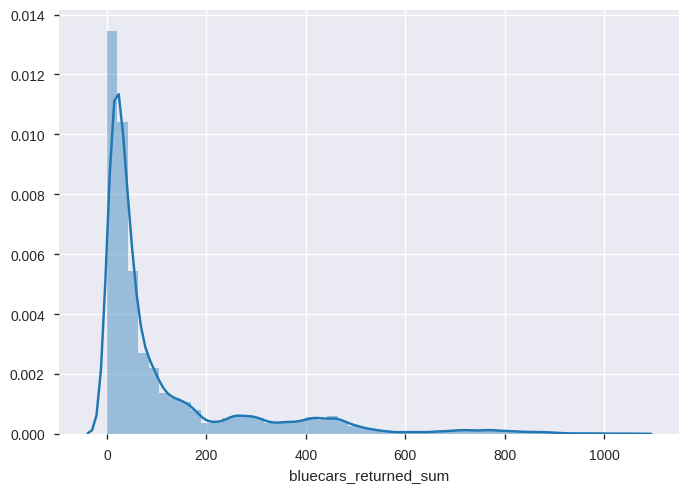

In [47]:
# Histogram of the bluecars_returned sum
sns.distplot(autolib.bluecars_returned_sum, kde = True)


The histogram shows us that the blue cars returned distribution is skewed to the right this is because the tail is long to the right side

In [48]:
# Converting the day of week from from numericals to strings for plotting
# Using the mapping function
# 

autolib['dayofweek'] = autolib.dayofweek.map({0: 'Monday', 1: 
                                          'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'})
# Confirming that our dataset day_type columns was successfully converted
autolib.head()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,Monday,weekday,110,103,22,20
1,75001,1/2/2018,1438,Tuesday,weekday,98,94,23,22
2,75001,1/3/2018,1439,Wednesday,weekday,138,139,27,27
3,75001,1/4/2018,1320,Thursday,weekday,104,104,25,21
4,75001,1/5/2018,1440,Friday,weekday,114,117,18,20


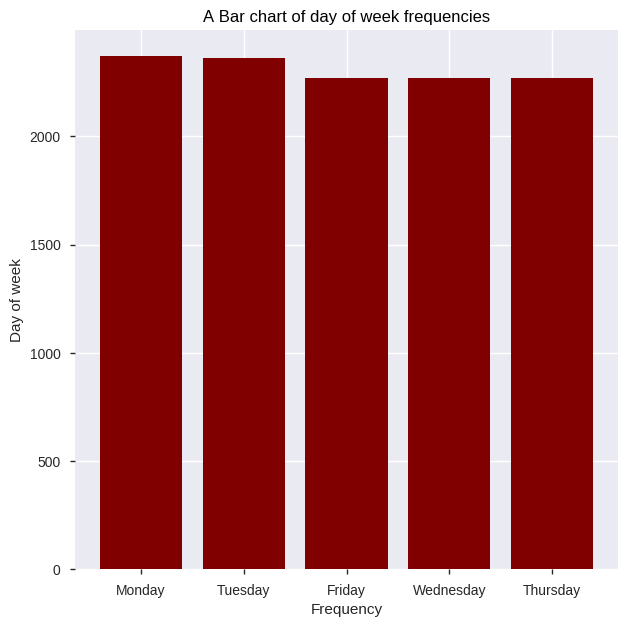

In [49]:
# Plotting a bar plot of the day of week categories 
# grouping the data to be plotted

day = autolib.dayofweek.value_counts()
day
# accessing the data to plot
# labels
sizes= day.index
sizes

# values
data = day.values
data

plt.figure(figsize = (7,7), dpi = 100)
plt.bar(sizes, data, color = 'maroon')
plt.ylabel("Day of week")
plt.xlabel('Frequency')
plt.title("A Bar chart of day of week frequencies", color = 'black')
plt.show()

From the bar chart, most activities involving picking, returning, and charging blues cars took place of Monday and Tuesday.


In [50]:
# Creating a frequency table of day of week column and the bluecars taken
# 
autolib.groupby('dayofweek')['bluecars_taken_sum'].sum()

dayofweek
Friday       288546
Monday       263893
Thursday     263207
Tuesday      261940
Wednesday    261849
Name: bluecars_taken_sum, dtype: int64

### **1.4.2 Measures of Central Tendency**


In [51]:
# Conducting univariate analysis for the bluecars taken sum column
# 
max1 = autolib.bluecars_taken_sum.max() 
min1 = autolib.bluecars_taken_sum.min() 
Range1 = max1 - min1
print('The mean is' + ' ' + str(autolib.bluecars_taken_sum.mean()))
print('The median is' + ' ' + str(autolib.bluecars_taken_sum.median()))
print('The mode is' + ' ' + str(autolib.bluecars_taken_sum.mode()))
print('The range is' + ' ' + str(Range1))
print('The standard deviation is' + ' ' + str(autolib.bluecars_taken_sum.std()))
print('The variance is' + ' ' + str(autolib.bluecars_taken_sum.var()))
print('The skewness is' + ' ' + str(autolib.bluecars_taken_sum.skew()))
print('The kurtosis is' + ' ' + str(autolib.bluecars_taken_sum.kurt()))
print('The Interquartile range is as follows' + ' ' + str(autolib.bluecars_taken_sum.quantile([0.25,0.5,0.75])))


The mean is 116.0286729036729
The median is 42.0
The mode is 0    12
dtype: int64
The range is 1093
The standard deviation is 169.62690469970084
The variance is 28773.286798001394
The skewness is 2.3281979815185876
The kurtosis is 5.553808116768028
The Interquartile range is as follows 0.25     18.0
0.50     42.0
0.75    126.0
Name: bluecars_taken_sum, dtype: float64


## **1.6 BIVARIATE ANALYSIS**
### **1.6.1 Visualizations**
#### **1.6.1.1 Scatter Plots**

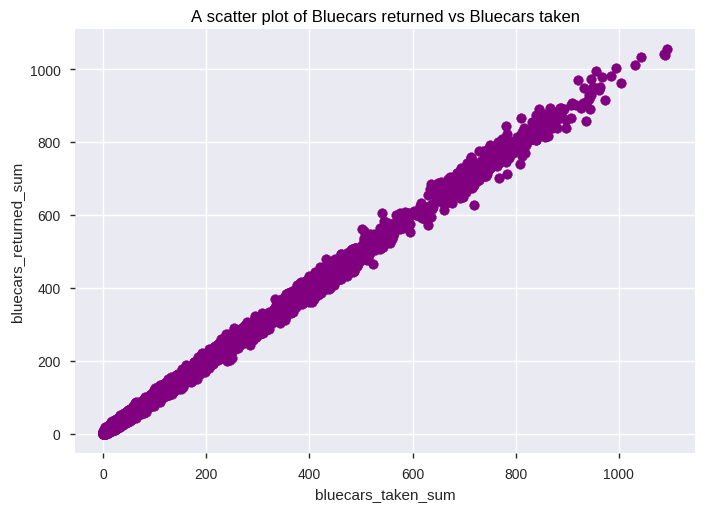

In [52]:
# Using Matplotlib: Plotting our scatterplot to compare two numerical the variables
plt.figure(dpi = 100)
plt.scatter(autolib['bluecars_taken_sum'], autolib['bluecars_returned_sum'], color = 'purple')
plt.title('A scatter plot of Bluecars returned vs Bluecars taken', color = 'black')
plt.xlabel('bluecars_taken_sum')
plt.ylabel('bluecars_returned_sum')
plt.show()


There is strong positive correlation between Bluecars returned vs taken.

As the blue cars taken increases, the bluecar returned also increases.

## **1.7 MULTIVARIATE ANALYSIS**

#### **1.7.1 Using Ordinary Least Squares**

In [53]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

#Split the categories into X and y
X = autolib.drop(['date', 'postalcode'], axis =1)
y = autolib['postalcode'].astype('int')

#Convert the categorical columns into binary formats
X1 =pd.get_dummies(X)

#Standardize the X values
sc = StandardScaler()
X = sc.fit_transform(X1)

#Implement the ordinary least squares
X2 = sm.add_constant(X)
model = sm.OLS(y, X2).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             postalcode   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     1710.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):               0.00
Time:                        04:57:33   Log-Likelihood:            -1.1472e+05
No. Observations:               11544   AIC:                         2.295e+05
Df Residuals:                   11534   BIC:                         2.295e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.879e+04     46.606   1905.110      0.0

## **1.8 Hypothesis Testing**

### **1.8.1 The Hypothesis**
Our claim, as highlighted in our questsion above, is going to serve as our null hypothesis i.e. in any two given stations, **the average number of bluecars taken is never the same.**

The alternative hypothesis will therefore be that; **the average number of bluecars is the same in every station**

### **1.8.2 Sample**

In [54]:
# Selecting two postal codes using simple random sampling

auto_sample = autolib.sample(n = 2, replace = False)
auto_sample

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
4825,92110,6/11/2018,1440,Monday,weekday,28,27,0,0
4202,91370,6/11/2018,1440,Monday,weekday,12,12,0,0


### **Step 1**

#### **Stating the Hypothesis**

The number of Bluecars taken in two random areas is not different (92110, 91370	)

Ho: b1 = b2

Ha: b1 ≠ b2



### **Step 2**

#### **Level of significance**
α = 0.05

If our P value is less than the chosen significance level then we reject the null hypothesis and therefore accept that our sample gives reasonable evidence to support the alternative hypothesis

In [58]:
# Creating a dataframe containing the 92110 postal code as p1

p1 = autolib[autolib['postalcode'] == 92110]
p1.head()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
4678,92110,1/1/2018,1440,Monday,weekday,6,12,0,0
4679,92110,1/2/2018,1438,Tuesday,weekday,9,10,0,0
4680,92110,1/3/2018,1439,Wednesday,weekday,21,14,0,0
4681,92110,1/4/2018,1320,Thursday,weekday,15,20,0,0
4682,92110,1/5/2018,1440,Friday,weekday,24,21,0,0


In [59]:
# Creating a dataframe containing the 91370 postal code as p2

p2 = autolib[autolib['postalcode'] == 91370]
p2.head()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
4055,91370,1/1/2018,1440,Monday,weekday,18,6,0,0
4056,91370,1/2/2018,1438,Tuesday,weekday,4,7,0,0
4057,91370,1/3/2018,1439,Wednesday,weekday,12,19,0,0
4058,91370,1/4/2018,1320,Thursday,weekday,5,6,0,0
4059,91370,1/5/2018,1440,Friday,weekday,6,9,0,0


### **Step 3**

**Calculating the test statistic**

Applying the conditions for an appropriate decision.

In [60]:
# Test statistic

ztest , pval1 = stests.ztest(p1['bluecars_taken_sum'], x2= p2['bluecars_taken_sum'], value=0, alternative='two-sided')

print(float(pval1))

if pval1 < 0.05:
    print("reject null hypothesis")
else:
    print("fail to reject the null hypothesis")

4.3784397428011925e-57
reject null hypothesis


### **Step 4**

**Evaluating our results**

The p-value = 4.3784397428011925e-57

This p-value is a very small value and it is less that the level of significance (0.05)

Hence we Reject the Null Hypothesis

### **Step 5**

**Interpreting the results**

There is sufficient evidence to conclude that the difference in the means of blue cars taken in postal code 92160 and 93600 is not 0.

The test was statistically significant.